<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_2_4_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_2.4'

In [4]:
os.listdir(base_path)

['data_add_delta_2.4_n20.csv',
 'data_add_delta_2.4_n30.csv',
 'data_add_delta_2.4_n60.csv',
 'data_add_delta_2.4_n120.csv',
 'data_add_delta_2.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2.4_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,81.470615,33.261106,65.305331,-3976.135322,-3786.098270,3474.207763,-7260.306033
1,0.0,1.0,92.863420,47.819294,85.627148,17453.888228,17690.198090,13554.838687,4135.359403
2,0.0,2.0,68.368596,72.417761,96.699836,7737.040518,7984.526711,14911.231690,-6926.704980
3,0.0,3.0,55.281411,53.196714,47.338817,-21531.582228,-21365.765286,-2823.835630,-18541.929655
4,0.0,4.0,63.185189,42.163546,40.445231,-12905.825794,-12750.031827,-4599.564188,-8150.467639
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,35.350706,32.482099,86.492307,6813.504998,6977.830109,-3150.994099,10128.824208
59996,999.0,56.0,47.193957,60.433707,20.790926,18944.529452,19082.948042,12248.327837,6834.620205
59997,999.0,57.0,65.187161,39.045467,47.026782,-10180.312618,-10019.053208,1108.252557,-11127.305765
59998,999.0,58.0,31.406007,74.203899,25.801678,36582.520427,36723.932011,17514.041605,19209.890406


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,81.470615,33.261106,65.305331,-3976.135322,-3786.098270,3474.207763,-7260.306033
1,0.0,1.0,92.863420,47.819294,85.627148,17453.888228,17690.198090,13554.838687,4135.359403
2,0.0,2.0,68.368596,72.417761,96.699836,7737.040518,7984.526711,14911.231690,-6926.704980
3,0.0,3.0,55.281411,53.196714,47.338817,-21531.582228,-21365.765286,-2823.835630,-18541.929655
4,0.0,4.0,63.185189,42.163546,40.445231,-12905.825794,-12750.031827,-4599.564188,-8150.467639
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,35.350706,32.482099,86.492307,6813.504998,6977.830109,-3150.994099,10128.824208
59996,999.0,56.0,47.193957,60.433707,20.790926,18944.529452,19082.948042,12248.327837,6834.620205
59997,999.0,57.0,65.187161,39.045467,47.026782,-10180.312618,-10019.053208,1108.252557,-11127.305765
59998,999.0,58.0,31.406007,74.203899,25.801678,36582.520427,36723.932011,17514.041605,19209.890406


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...         y_hat         e_hat
rep   index                        ...                            
0.0   0.0    81.470615  33.261106  ...   3474.207763  -7260.306033
      1.0    92.863420  47.819294  ...  13554.838687   4135.359403
      2.0    68.368596  72.417761  ...  14911.231690  -6926.704980
      3.0    55.281411  53.196714  ...  -2823.835630 -18541.929655
      4.0    63.185189  42.163546  ...  -4599.564188  -8150.467639
...                ...        ...  ...           ...           ...
999.0 55.0   35.350706  32.482099  ...  -3150.994099  10128.824208
      56.0   47.193957  60.433707  ...  12248.327837   6834.620205
      57.0   65.187161  39.045467  ...   1108.252557 -11127.305765
      58.0   31.406007  74.203899  ...  17514.041605  19209.890406
      59.0   50.611013  46.208323  ...   4398.301528   1178.837641

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...         y_hat         e_hat
rep   index                        ...                            
0.0   0.0    81.470615  33.261106  ...   3474.207763  -7260.306033
      1.0    92.863420  47.819294  ...  13554.838687   4135.359403
      2.0    68.368596  72.417761  ...  14911.231690  -6926.704980
      3.0    55.281411  53.196714  ...  -2823.835630 -18541.929655
      4.0    63.185189  42.163546  ...  -4599.564188  -8150.467639
...                ...        ...  ...           ...           ...
999.0 55.0   35.350706  32.482099  ...  -3150.994099  10128.824208
      56.0   47.193957  60.433707  ...  12248.327837   6834.620205
      57.0   65.187161  39.045467  ...   1108.252557 -11127.305765
      58.0   31.406007  74.203899  ...  17514.041605  19209.890406
      59.0   50.611013  46.208323  ...   4398.301528   1178.837641

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,81.470615,33.261106,65.305331,-3976.135322,-3786.098270,3474.207763,-7260.306033
1,0.0,1.0,92.863420,47.819294,85.627148,17453.888228,17690.198090,13554.838687,4135.359403
2,0.0,2.0,68.368596,72.417761,96.699836,7737.040518,7984.526711,14911.231690,-6926.704980
3,0.0,3.0,55.281411,53.196714,47.338817,-21531.582228,-21365.765286,-2823.835630,-18541.929655
4,0.0,4.0,63.185189,42.163546,40.445231,-12905.825794,-12750.031827,-4599.564188,-8150.467639
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,35.350706,32.482099,86.492307,6813.504998,6977.830109,-3150.994099,10128.824208
59996,999.0,56.0,47.193957,60.433707,20.790926,18944.529452,19082.948042,12248.327837,6834.620205
59997,999.0,57.0,65.187161,39.045467,47.026782,-10180.312618,-10019.053208,1108.252557,-11127.305765
59998,999.0,58.0,31.406007,74.203899,25.801678,36582.520427,36723.932011,17514.041605,19209.890406


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...         y_hat         e_hat
rep   index                        ...                            
0.0   0.0    81.470615  33.261106  ...   3474.207763  -7260.306033
      1.0    92.863420  47.819294  ...  13554.838687   4135.359403
      2.0    68.368596  72.417761  ...  14911.231690  -6926.704980
      3.0    55.281411  53.196714  ...  -2823.835630 -18541.929655
      4.0    63.185189  42.163546  ...  -4599.564188  -8150.467639
...                ...        ...  ...           ...           ...
999.0 55.0   35.350706  32.482099  ...  -3150.994099  10128.824208
      56.0   47.193957  60.433707  ...  12248.327837   6834.620205
      57.0   65.187161  39.045467  ...   1108.252557 -11127.305765
      58.0   31.406007  74.203899  ...  17514.041605  19209.890406
      59.0   50.611013  46.208323  ...   4398.301528   1178.837641

[60000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

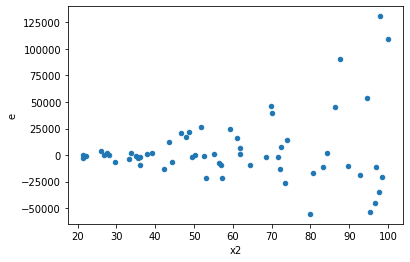

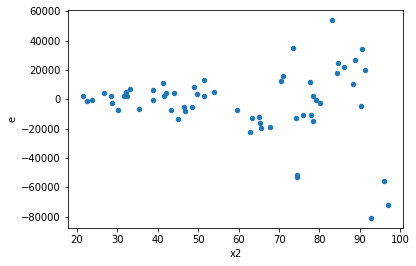

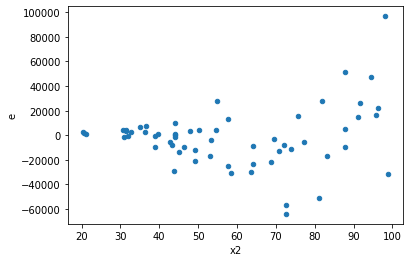

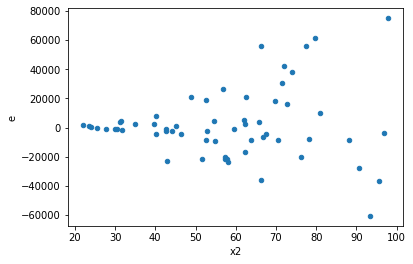

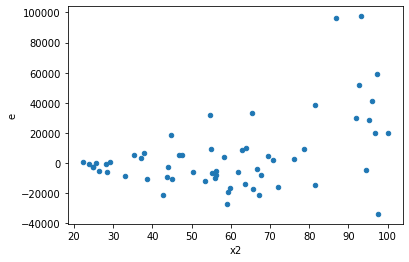

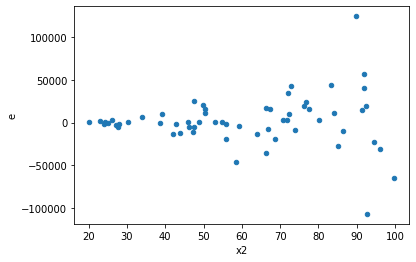

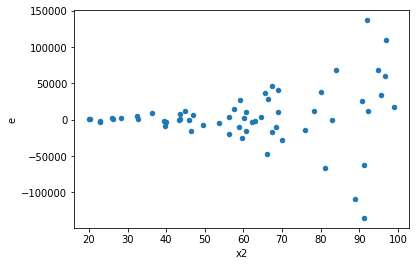

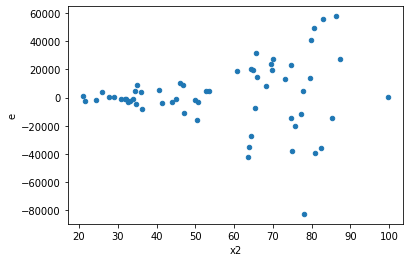

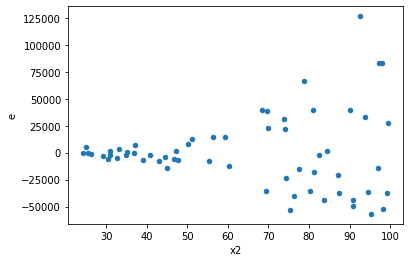

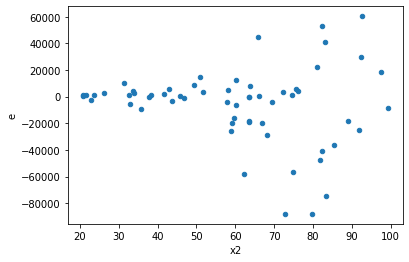

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,21.0,21.0,51245563194.16398,1004865581.3209414,2562278159.708199,50243279.06604707,50.99743104624935,2.9265478929119126e-13,0.9999999999998537,Reject001=0 : Heteroscedasticity
1.0,21.0,21.0,27740960529.341675,833906586.7947199,1387048026.4670837,41695329.339736,33.26626863084196,2.1373125491663814e-11,0.9999999999893134,Reject001=0 : Heteroscedasticity
2.0,21.0,21.0,15284866442.824081,1266204787.0178325,764243322.1412041,63310239.35089163,12.071401561214298,3.4509071467070385e-07,0.9999998274546427,Reject001=0 : Heteroscedasticity
3.0,21.0,21.0,25789709138.12372,1701933327.2643287,1289485456.9061859,85096666.36321643,15.153184161202041,4.2757634322043714e-08,0.9999999786211828,Reject001=0 : Heteroscedasticity
4.0,21.0,21.0,18397908942.03214,1952026015.8080382,919895447.101607,97601300.7904019,9.42503265481139,3.0945124036563243e-06,0.9999984527437982,Reject001=0 : Heteroscedasticity
5.0,21.0,21.0,31061943806.078686,1710762522.50433,1553097190.3039343,85538126.1252165,18.156782953491472,7.794036971375817e-09,0.9999999961029815,Reject001=0 : Heteroscedasticity
6.0,21.0,21.0,87373224028.51851,957019255.000732,4368661201.425925,47850962.7500366,91.2972477533398,6.661338147750939e-16,0.9999999999999997,Reject001=0 : Heteroscedasticity
7.0,21.0,21.0,23792402762.076073,602877082.2335799,1189620138.1038036,30143854.111678995,39.464765643318806,3.880451515669847e-12,0.9999999999980598,Reject001=0 : Heteroscedasticity
8.0,21.0,21.0,54329259737.643776,781637105.6518427,2716462986.882189,39081855.28259213,69.50701207094836,1.2434497875801753e-14,0.9999999999999938,Reject001=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,51245563194.16398,1004865581.3209414,2562278159.708199,50243279.06604707,50.99743104624935,2.9265478929119126e-13,Reject001=0 : Heteroscedasticity
1.0,21.0,21.0,27740960529.341675,833906586.7947199,1387048026.4670837,41695329.339736,33.26626863084196,2.1373125491663814e-11,Reject001=0 : Heteroscedasticity
2.0,21.0,21.0,15284866442.824081,1266204787.0178325,764243322.1412041,63310239.35089163,12.071401561214298,3.4509071467070385e-07,Reject001=0 : Heteroscedasticity
3.0,21.0,21.0,25789709138.12372,1701933327.2643287,1289485456.9061859,85096666.36321643,15.153184161202041,4.2757634322043714e-08,Reject001=0 : Heteroscedasticity
4.0,21.0,21.0,18397908942.03214,1952026015.8080382,919895447.101607,97601300.7904019,9.42503265481139,3.0945124036563243e-06,Reject001=0 : Heteroscedasticity
5.0,21.0,21.0,31061943806.078686,1710762522.50433,1553097190.3039343,85538126.1252165,18.156782953491472,7.794036971375817e-09,Reject001=0 : Heteroscedasticity
6.0,21.0,21.0,87373224028.51851,957019255.000732,4368661201.425925,47850962.7500366,91.2972477533398,6.661338147750939e-16,Reject001=0 : Heteroscedasticity
7.0,21.0,21.0,23792402762.076073,602877082.2335799,1189620138.1038036,30143854.111678995,39.464765643318806,3.880451515669847e-12,Reject001=0 : Heteroscedasticity
8.0,21.0,21.0,54329259737.643776,781637105.6518427,2716462986.882189,39081855.28259213,69.50701207094836,1.2434497875801753e-14,Reject001=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64